# Employee Performance Analytics

_Author: Nevin Joshua Lyons_

## Problem Statements

### Problem Statement as questions
: 
>What is the distribution of educational qualifications among employees?
How does the length of service (Joining Year) vary across different cities?
Is there a correlation between Payment Tier and Experience in Current Domain?
What is the gender distribution within the workforce?
Are there any patterns in leave-taking behavior among employees?
?
---

## Load packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import plotly as py
from plotly.offline import iplot, plot, init_notebook_mode, download_plotlyjs
import plotly.graph_objs as go
import plotly.offline as offline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

---

## Load data

In [3]:
employee = pd.read_csv('Employee.csv')

In [4]:
employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


The main information i would need would be based on on listing attributes (e.g., property type, number of bedrooms), location (neighborhood, proximity to attractions), historical booking data, and occupancy rates.

In [5]:
employee.isnull().inplace=True

In [6]:
employee.shape

(4653, 9)

In [7]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [8]:
employee.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [9]:
employee.isnull().sum()


Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

# Step 2: Cleaning the data Types of data need to clean:

- Visualisation

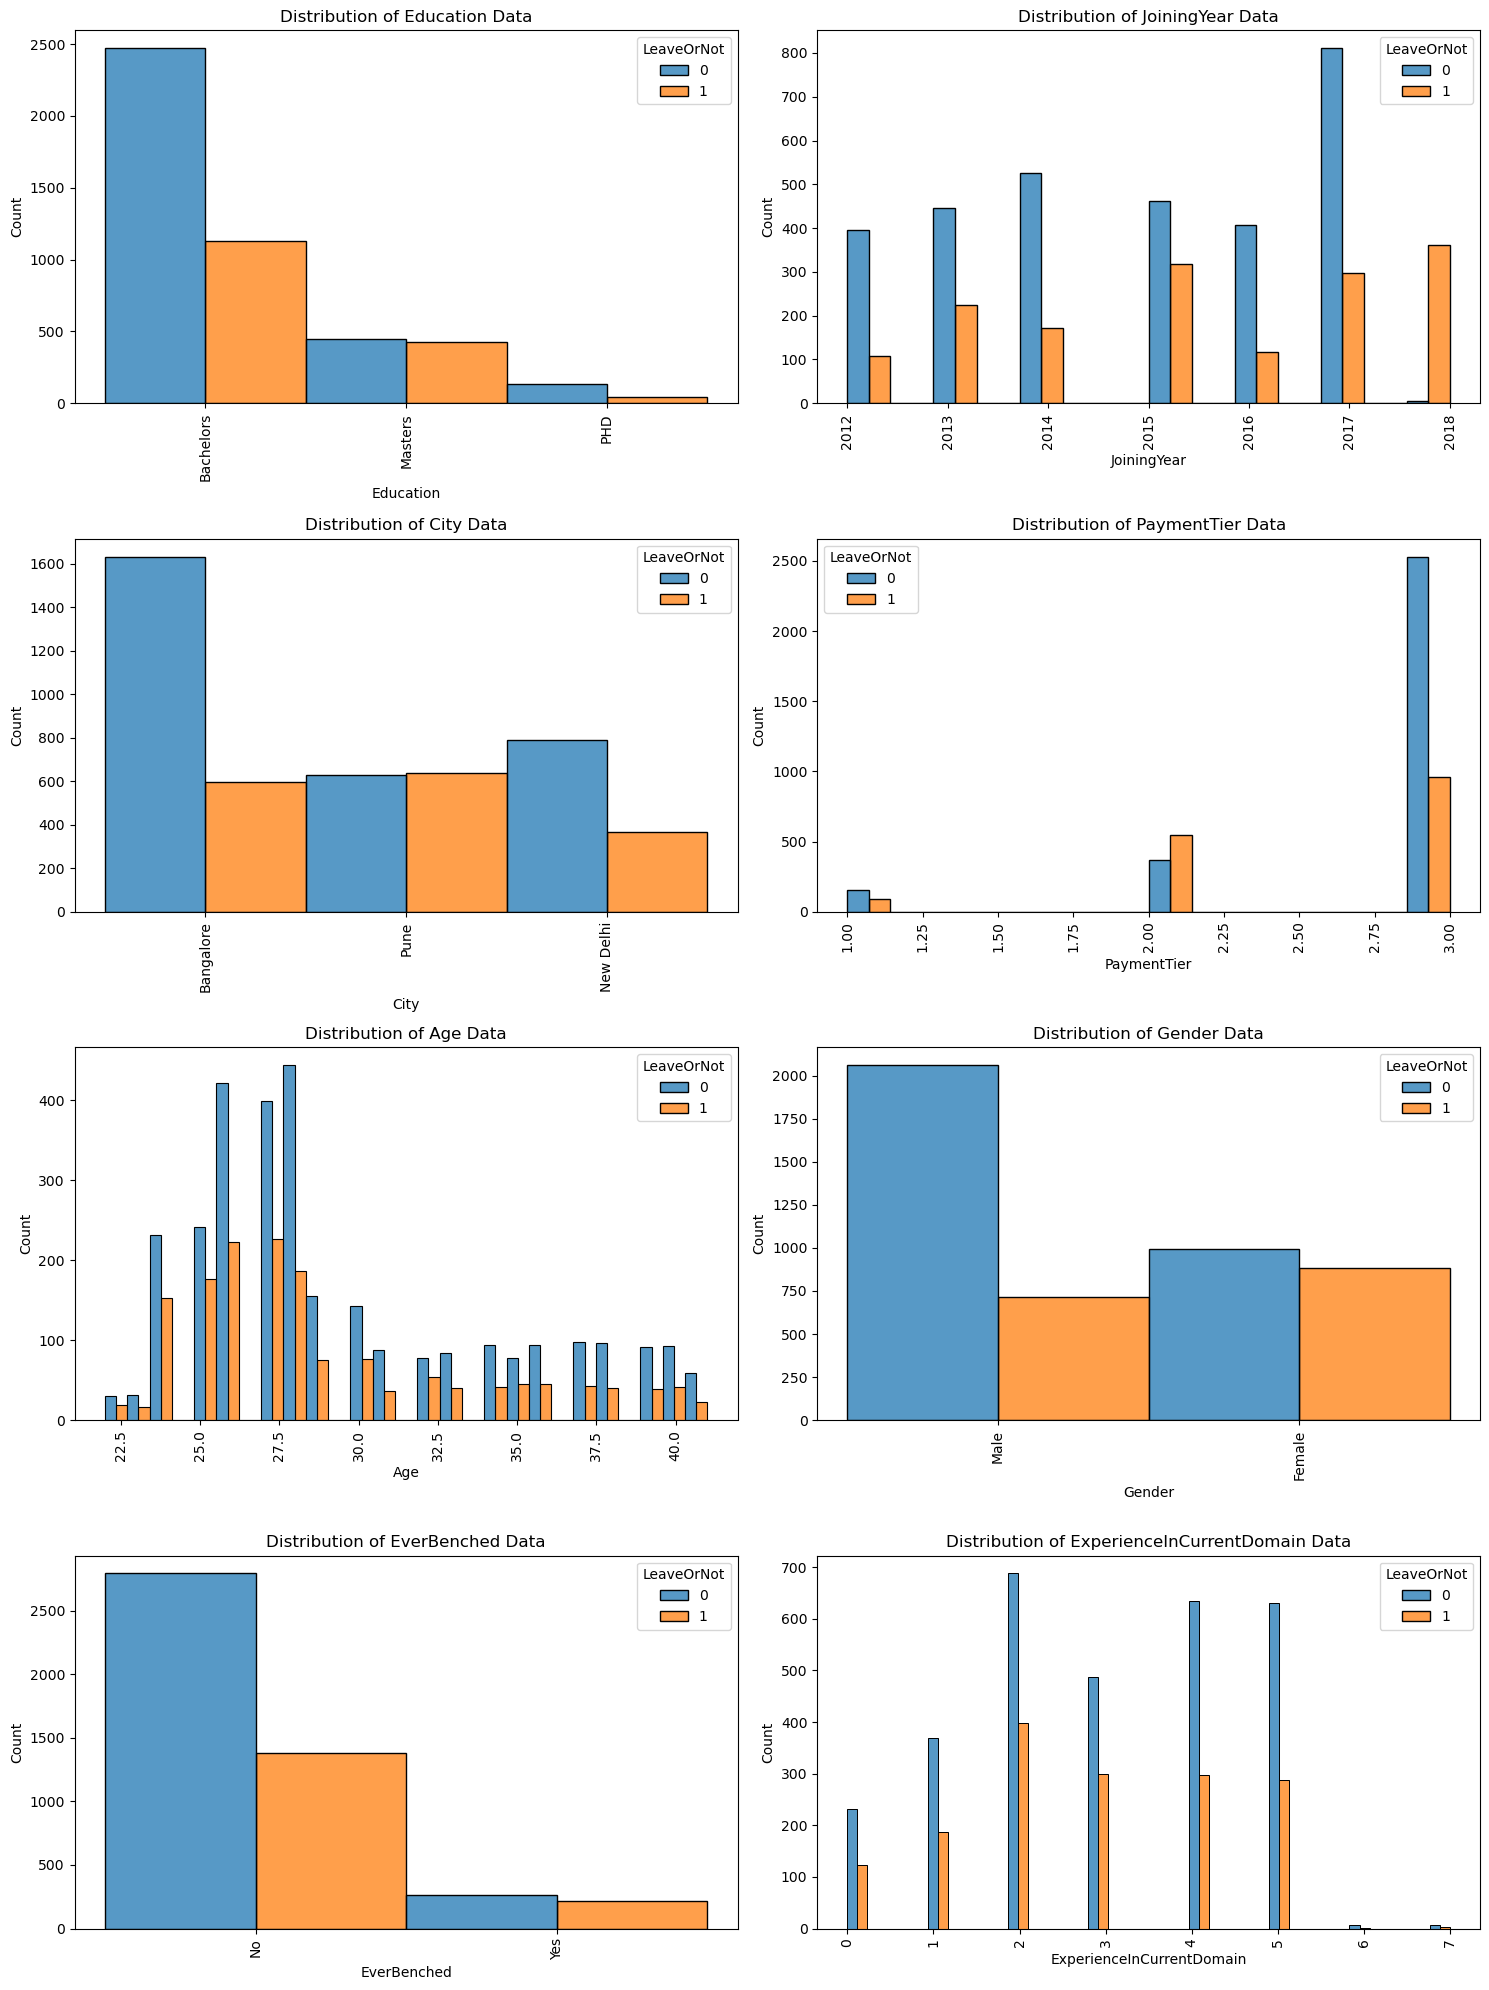

In [10]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (15, 20))
for i, col in enumerate(employee.columns[:-1], 1):
    plt.subplot(4, 2, i)
    sns.histplot(x = employee[col], hue = employee["LeaveOrNot"], multiple = "dodge")
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.xticks(rotation = 90)
    plt.plot()

Employee with bachelor's degree stayed at company and at the same time, others with bachelor's degree left.¶
Many employees entered most in 2017 and next year many people left.
People who has hometown in Bangalore & New Delhi stayed at their company.
As higher their salary, stay more employess.
Twentieth employees usually stay or leave their workplace and thirtieth ones does not so like twentieth.
Any gender usually stay at their workplace, but the number of female employees who left is more than one of male employees.
As their experience, do many employees stay or leave.

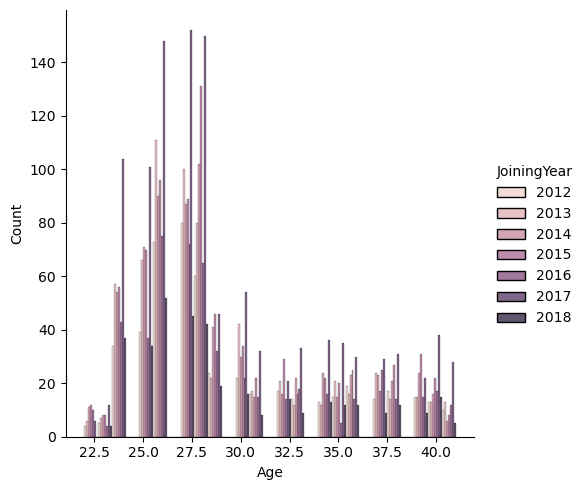

In [11]:
sns.displot(x = employee["Age"], hue = employee["JoiningYear"], multiple = "dodge")
plt.show()

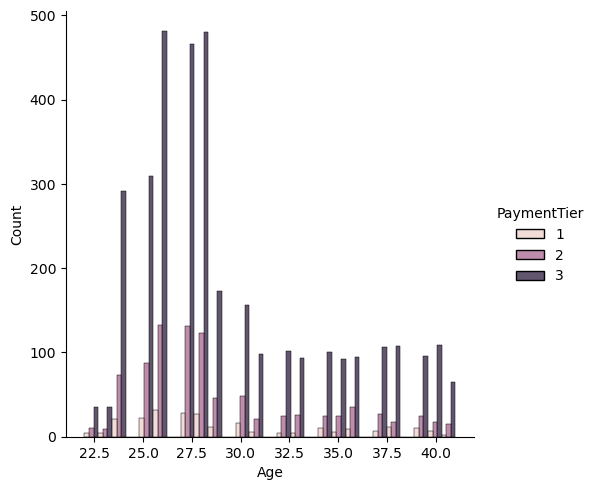

In [12]:
sns.displot(x = employee["Age"], hue = employee["PaymentTier"], multiple = "dodge")
plt.show()

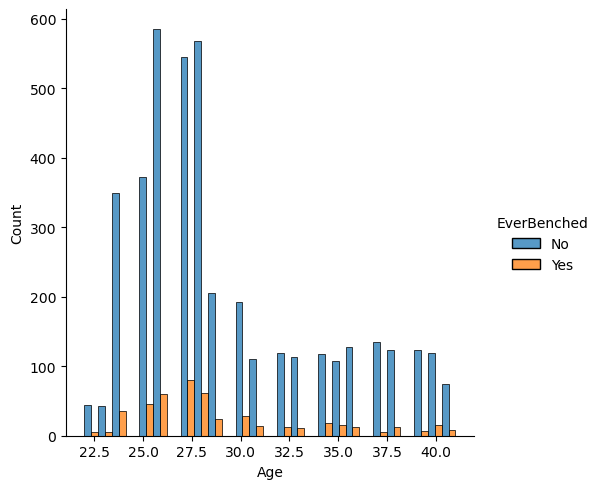

In [13]:
sns.displot(x = employee["Age"], hue = employee["EverBenched"], multiple = "dodge")
plt.show()

##### Many employees below age 30 entered their workplace and their salaries are very high in average.
Most emplyees did not benched, especially for twentieth

# Preprocessing

Outlier

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols = ["Education", "City", "Gender", "EverBenched"]
for label in cat_cols:
    employee[label] = le.fit_transform(employee[label])
employee

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


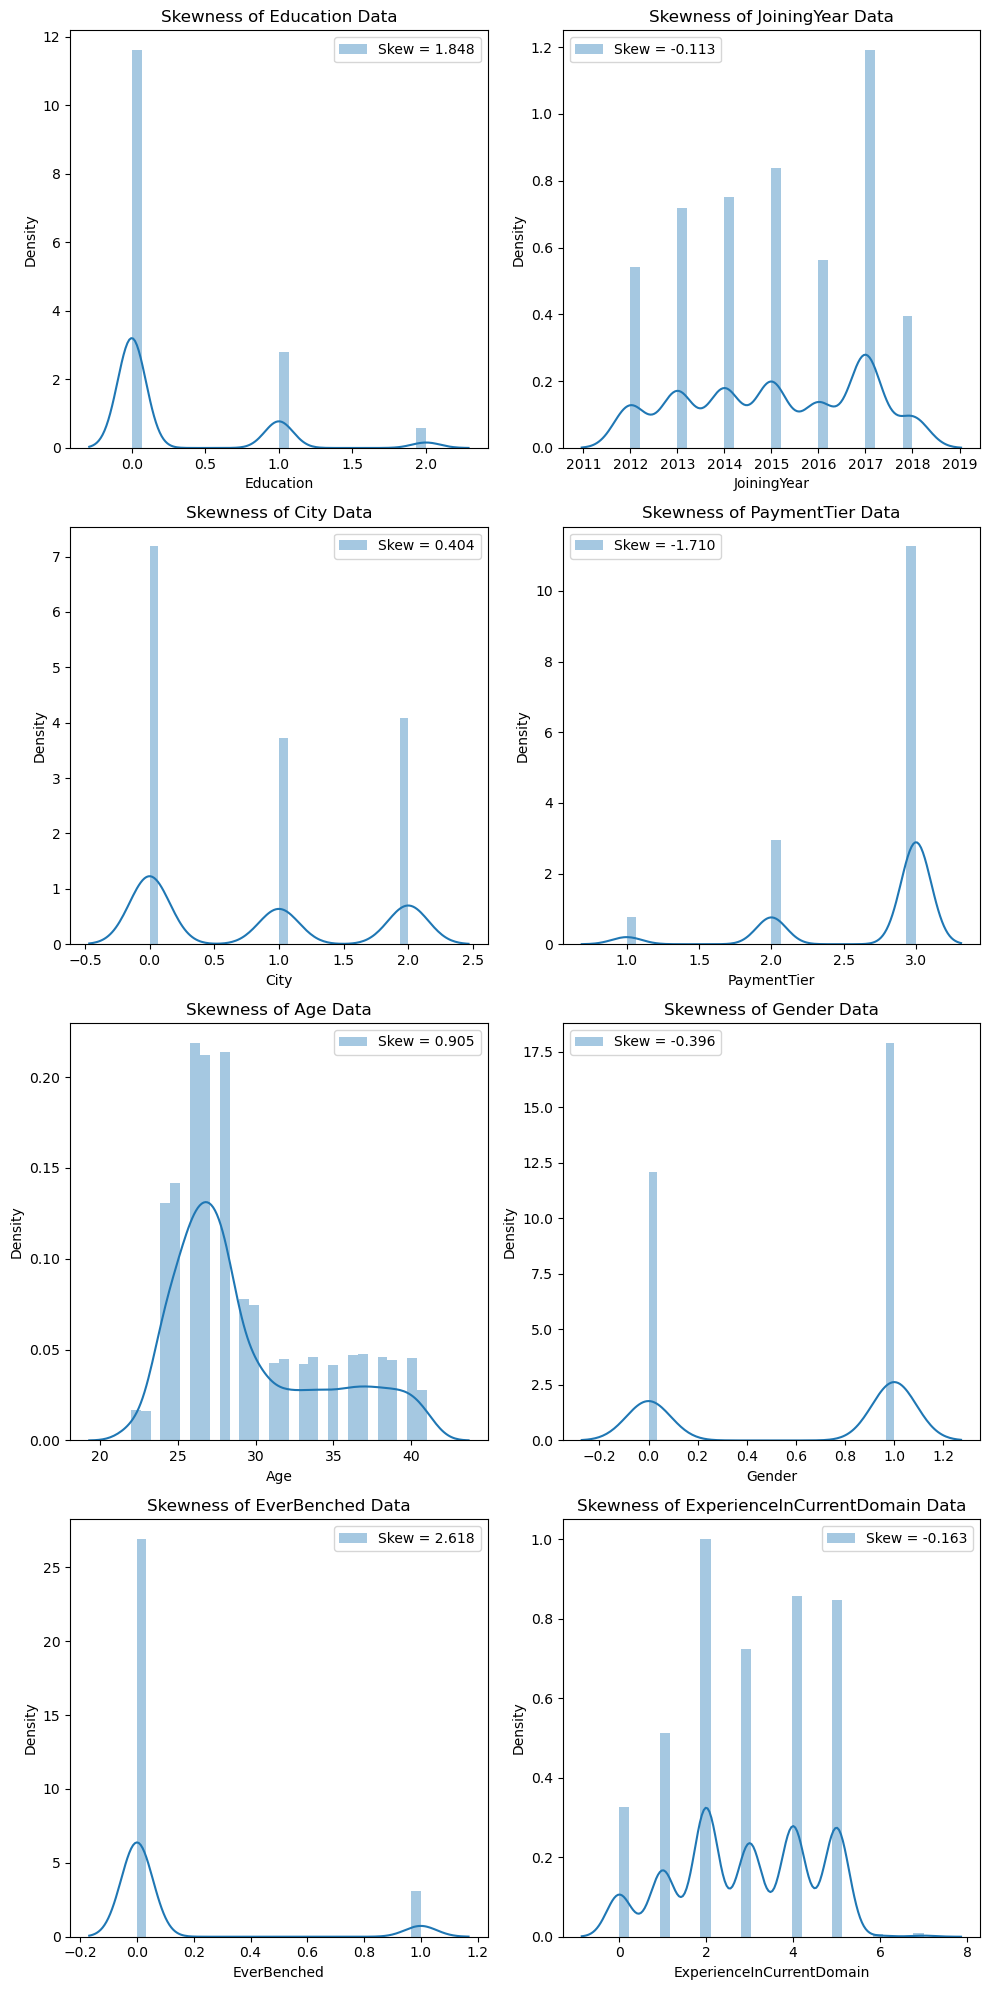

In [15]:
# Check skewness of all features
# How many outliers are there
plt.figure(figsize = (10, 20))
for i, col in enumerate(employee.columns[:-1], 1):
    plt.subplot(4, 2, i)
    skewness = employee[col].skew()
    sns.distplot(employee[col], label = "Skew = %.3f" %(skewness), bins = 30)
    plt.title(f"Skewness of {col} Data")
    plt.legend(loc = "best")
    plt.tight_layout()
    plt.plot()

Fortunately, all features do not contain many outliers.


Let's proceed ML of Classification on "LeaveOrNot"

In [16]:
# Split Data with Train/Test
X = employee.iloc[:, :-1]
y = employee.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
def accuracy(X_train, X_test, y_train, y_test):
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    y_reg = reg.predict(X_test)
    
    svc = SVC()
    svc.fit(X_train, y_train)
    y_svc = svc.predict(X_test)
    
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_dtc = dtc.predict(X_test)
    
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_rfc = rfc.predict(X_test)
    
    gbc = GradientBoostingClassifier()
    gbc.fit(X_train, y_train)
    y_gbc = gbc.predict(X_test)
    
    abc = AdaBoostClassifier()
    abc.fit(X_train, y_train)
    y_abc = abc.predict(X_test)
    
    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    y_knc = knc.predict(X_test)
    
    return accuracy_score(y_test, y_reg), accuracy_score(y_test, y_svc), accuracy_score(y_test, y_dtc), accuracy_score(y_test, y_rfc), accuracy_score(y_test, y_gbc), accuracy_score(y_test, y_abc), accuracy_score(y_test, y_knc)

In [18]:
def precision(X_train, X_test, y_train, y_test):
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    y_reg = reg.predict(X_test)
    
    svc = SVC()
    svc.fit(X_train, y_train)
    y_svc = svc.predict(X_test)
    
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_dtc = dtc.predict(X_test)
    
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_rfc = rfc.predict(X_test)
    
    gbc = GradientBoostingClassifier()
    gbc.fit(X_train, y_train)
    y_gbc = gbc.predict(X_test)
    
    abc = AdaBoostClassifier()
    abc.fit(X_train, y_train)
    y_abc = abc.predict(X_test)
    
    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    y_knc = knc.predict(X_test)
    
    return precision_score(y_test, y_reg), precision_score(y_test, y_svc), precision_score(y_test, y_dtc), precision_score(y_test, y_rfc), precision_score(y_test, y_gbc), precision_score(y_test, y_abc), precision_score(y_test, y_knc)

3. Review Sentiment Analysis

In [19]:
def recall(X_train, X_test, y_train, y_test):
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    y_reg = reg.predict(X_test)
    
    svc = SVC()
    svc.fit(X_train, y_train)
    y_svc = svc.predict(X_test)
    
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_dtc = dtc.predict(X_test)
    
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_rfc = rfc.predict(X_test)
    
    gbc = GradientBoostingClassifier()
    gbc.fit(X_train, y_train)
    y_gbc = gbc.predict(X_test)
    
    abc = AdaBoostClassifier()
    abc.fit(X_train, y_train)
    y_abc = abc.predict(X_test)
    
    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    y_knc = knc.predict(X_test)
    
    return recall_score(y_test, y_reg), recall_score(y_test, y_svc), recall_score(y_test, y_dtc), recall_score(y_test, y_rfc), recall_score(y_test, y_gbc), recall_score(y_test, y_abc), recall_score(y_test, y_knc)

In [20]:
def f1(X_train, X_test, y_train, y_test):
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    y_reg = reg.predict(X_test)
    
    svc = SVC()
    svc.fit(X_train, y_train)
    y_svc = svc.predict(X_test)
    
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_dtc = dtc.predict(X_test)
    
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_rfc = rfc.predict(X_test)
    
    gbc = GradientBoostingClassifier()
    gbc.fit(X_train, y_train)
    y_gbc = gbc.predict(X_test)
    
    abc = AdaBoostClassifier()
    abc.fit(X_train, y_train)
    y_abc = abc.predict(X_test)
    
    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    y_knc = knc.predict(X_test)
    
    return f1_score(y_test, y_reg), f1_score(y_test, y_svc), f1_score(y_test, y_dtc), f1_score(y_test, y_rfc), f1_score(y_test, y_gbc), f1_score(y_test, y_abc), f1_score(y_test, y_knc)

In [21]:
# Scoreboard of 7 models.
scores = pd.DataFrame(columns = ["REG", "SVC", "DTC", "RFC", "GBC", "ABC", "KNC"],
                     index = ["ACC", "PREC", "REC", "F1"])
acc = [reg, svc, dtc, rfc, gbc, abc, knc] = accuracy(X_train, X_test, y_train, y_test)
scores.iloc[0, :] = acc
prec = [reg, svc, dtc, rfc, gbc, abc, knc] = precision(X_train, X_test, y_train, y_test)
scores.iloc[1, :] = prec
rec = [reg, svc, dtc, rfc, gbc, abc, knc] = recall(X_train, X_test, y_train, y_test)
scores.iloc[2, :] = rec
f_1 = [reg, svc, dtc, rfc, gbc, abc, knc] = f1(X_train, X_test, y_train, y_test)
scores.iloc[3, :] = f_1
scores

,REG,SVC,DTC,RFC,GBC,ABC,KNC
ACC,0.709622,0.662371,0.799828,0.832474,0.841065,0.790378,0.767182
PREC,0.618026,0.0,0.724324,0.775811,0.848993,0.768953,0.703333
REC,0.366412,0.0,0.676845,0.669211,0.643766,0.541985,0.536896
F1,0.460064,0.0,0.703412,0.725034,0.732272,0.635821,0.608947


GradientBoostingClassifier has highest accuracy/precision/recall/f1 score on 7 models.




Let's remove outliers on dataset for increasing score

In [22]:
# Remove outliers with IQR method
for col in employee.columns[:-1]:
    Q1 = employee[col].quantile(0.25)
    Q3 = employee[col].quantile(0.75)
    IQR = Q3 - Q1
    employee = employee[(employee[col] >= (Q1 - 1.5*IQR)) & (employee[col] <= (Q3 + 1.5*IQR))]
employee

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
2,0,2014,1,3,38,0,0,2,0
5,0,2016,0,3,22,1,0,0,0
6,0,2015,1,3,38,1,0,0,0
7,0,2016,0,3,34,0,0,2,1
...,...,...,...,...,...,...,...,...,...
4642,0,2012,0,3,36,0,0,4,0
4643,0,2013,0,3,31,0,0,5,0
4646,0,2013,0,3,25,0,0,3,0
4647,0,2016,2,3,30,1,0,2,0


In [23]:
# Split Data which outliers are removed with Train/Test
X = employee.iloc[:, :-1]
y = employee.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [24]:
# Scoreboard of 7 models which outliers removed.
scores = pd.DataFrame(columns = ["REG", "SVC", "DTC", "RFC", "GBC", "ABC", "KNC"],
                     index = ["ACC", "PREC", "REC", "F1"])
acc = [reg, svc, dtc, rfc, gbc, abc, knc] = accuracy(X_train, X_test, y_train, y_test)
scores.iloc[0, :] = acc
prec = [reg, svc, dtc, rfc, gbc, abc, knc] = precision(X_train, X_test, y_train, y_test)
scores.iloc[1, :] = prec
rec = [reg, svc, dtc, rfc, gbc, abc, knc] = recall(X_train, X_test, y_train, y_test)
scores.iloc[2, :] = rec
f_1 = [reg, svc, dtc, rfc, gbc, abc, knc] = f1(X_train, X_test, y_train, y_test)
scores.iloc[3, :] = f_1
scores

,REG,SVC,DTC,RFC,GBC,ABC,KNC
ACC,0.75625,0.75625,0.821875,0.826562,0.859375,0.84375,0.809375
PREC,0.0,0.0,0.688073,0.75,0.923077,1.0,0.736111
REC,0.0,0.0,0.480769,0.480769,0.461538,0.358974,0.339744
F1,0.0,0.0,0.566038,0.565737,0.615385,0.528302,0.464912


By removing outliers, we see that GBC score has higher than one which contains outliers.


Now let's check train/test model score of GBC.

<Axes: >

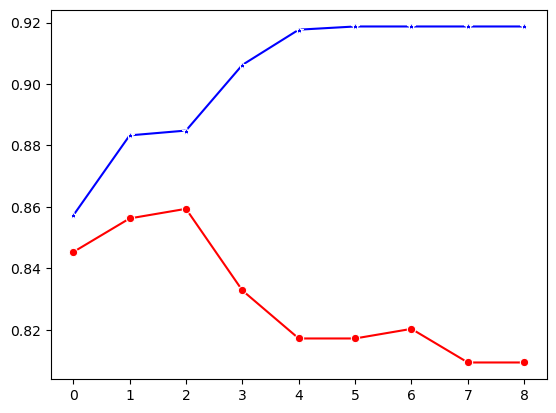

In [25]:
train_scores = []
test_scores = []
for i in range(1, 10):
    gbc = GradientBoostingClassifier(n_estimators = i * 50, max_depth = i + 1, max_features = i/10, min_samples_split = i + 1)
    gbc.fit(X_train, y_train)
    train_scores.append(gbc.score(X_train, y_train))
    test_scores.append(gbc.score(X_test, y_test))
sns.lineplot(train_scores, marker = '*', color = 'b')
sns.lineplot(test_scores, marker = 'o', color = 'r')

In [66]:
gbc = GradientBoostingClassifier(n_estimators = 200, max_depth = 5, max_features = 0.4, min_samples_split = 5)
gbc.fit(X_train, y_train)
print("GBC Train Model Score :", gbc.score(X_train, y_train))
print("GBC Test Model Score :", gbc.score(X_test, y_test))

GBC Train Model Score : 0.8939524218973918
GBC Test Model Score : 0.845360824742268


### Thank you for reading my code.